<br><br> <!-- Creates a small blank space -->

<div style="background-color: #800000; padding: 20px; position: relative;">
    <h1 align="center" style="color: white; font-weight: bold;">
        AtliQ Hotels Data Analysis Project
        <img src="datasets/python_logo.png" style="vertical-align: middle; height: 60px; margin-left: 30px;">
    </h1>
    <div style="position: absolute; bottom: 10px; right: 20px; color: white; font-size: small;">
        - Inder Panda
    </div>
</div>


<br> <!-- Creates a small blank space -->

## **Problem Statement:**

Atliq Grands, a leading player in India's hotel industry, is currently facing challenges with rising competition and declining revenue. The company is also experiencing a loss of market share. To combat these challenges, the management team has decided to harness data and strategic insights. With limited internal expertise in data analysis, they have sought external support to assess the situation, deliver actionable insights, and develop effective strategies for customer retention and revenue growth.

## **Project Goal:**

The goal of this project is to conduct a comprehensive analysis of the hotel industry domain using Python. By leveraging data-driven insights and strategic recommendations, the objective is to empower Atliq Grands to make informed decisions. The ultimate aim is to assist Atliq Grands in regaining a competitive edge in the market, addressing their challenges of revenue decline and market share loss effectively.

## **Datasets:**
- dim_date.csv
- dim_hotels.csv
- dim_rooms.csv
- fact_bookings.csv
- new_data_august.csv
- fact_aggregated_bookings.csv

## **Data Analysis Process:**
1. Data Import & Exploration
2. Data Cleaning
3. Data Transformation
4. Data Insights
5. Key Insights Summary
6. Recommendations

<br><br> <!-- Creates a small blank space -->

<div style="background-color: #4CAF50; padding: 12px; border-radius: 12px;">
    <h2 align="center" style="color: white; font-weight: bold ">1. Data Import and Data Exploration</h2>
</div>


In [1]:
import pandas as pd

**Read bookings data in a datagrame**

In [2]:
df_bookings = pd.read_csv('datasets/fact_bookings.csv')

**Explore bookings data**

In [3]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
df_bookings.shape

(134590, 12)

In [5]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [6]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [7]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

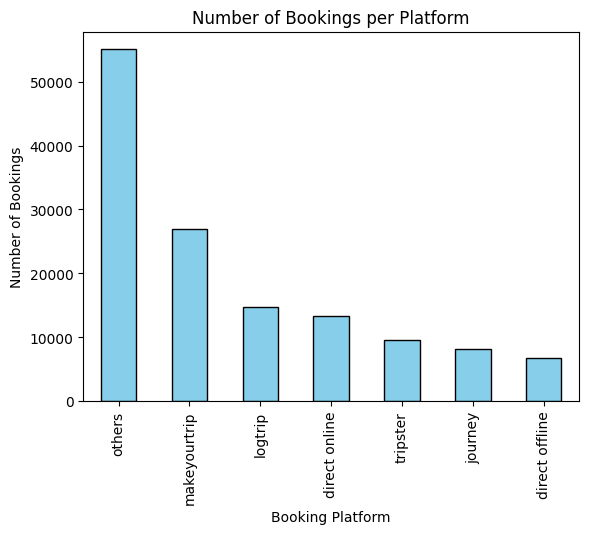

In [8]:

# Plot the value counts of booking platforms as a bar chart

import matplotlib.pyplot as plt

df_bookings.booking_platform.value_counts().plot(kind="bar", color='skyblue', edgecolor='black')

# Add a title and labels
plt.title("Number of Bookings per Platform")
plt.xlabel("Booking Platform")
plt.ylabel("Number of Bookings")

# Show the plot
plt.show()


In [9]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Read rest of the files**

In [10]:
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [11]:
df_hotels.shape

(25, 4)

In [12]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [13]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

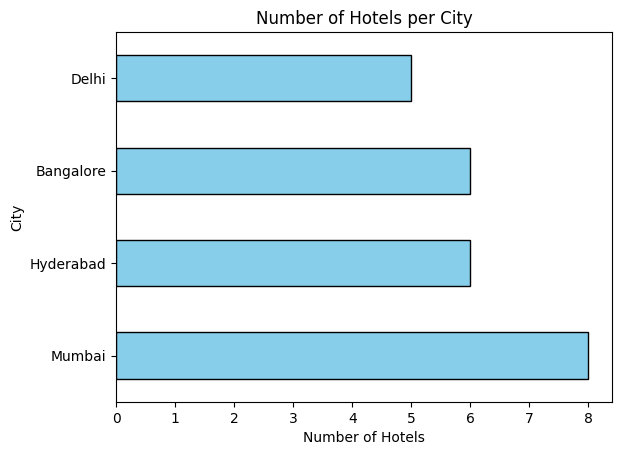

In [14]:
import matplotlib.pyplot as plt

# Plot value counts of cities as a horizontal bar chart

ax = df_hotels.city.value_counts().plot(kind="barh", color='skyblue', edgecolor='black')

# Add title and labels
plt.title("Number of Hotels per City")
plt.xlabel("Number of Hotels")
plt.ylabel("City")

plt.show()



<br> <!-- Creates a small blank space -->


## **Exercise: Explore aggregate bookings** 


<br> <!-- Creates a small blank space -->

In [15]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


#### **Exercise-1. Find out unique property ids in aggregate bookings dataset**

In [16]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

<br>

#### **Exercise-2. Find out total bookings per property_id**

In [17]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

<br>

#### **Exercise-3. Find out days on which bookings are greater than capacity**

In [18]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


<br>

#### **Exercise-4. Find out properties that have highest capacity**

In [19]:
df_agg_bookings.capacity.max()

50.0

<br><br>

<div style="background-color: #4CAF50; padding: 12px; border-radius: 12px;">
    <h2 align="center" style="color: white; font-weight: bold ">2. Data Cleaning</h2>
</div>


<br> <!-- Creates a small blank space -->

In [20]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


<br>

#### **(1) Clean invalid guests**

In [21]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


As you can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [22]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [23]:
df_bookings.shape

(134578, 12)

<br> <!-- Creates a small blank space -->

#### **(2) Outlier removal in revenue generated**

In [24]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [25]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(15378.036937686695, 13500.0)

In [26]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [27]:
higher_limit = avg + 3*std
higher_limit

294498.50173207896

In [28]:
lower_limit = avg - 3*std
lower_limit

-263742.4278567056

In [29]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [30]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [31]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings.shape

(134573, 12)

In [32]:
df_bookings.revenue_realized.describe().round(2)

count    134573.00
mean      12695.98
std        6927.79
min        2600.00
25%        7600.00
50%       11700.00
75%       15300.00
max       45220.00
Name: revenue_realized, dtype: float64

In [33]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33479.358661845814

In [34]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [35]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe().round(2)

count    16071.00
mean     23439.31
std       9048.60
min       7600.00
25%      19000.00
50%      26600.00
75%      32300.00
max      45220.00
Name: revenue_realized, dtype: float64

In [36]:
# mean + 3*standard deviation
23439+3*9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

In [37]:
df_bookings[df_bookings.booking_id=="May012216558RT213"]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [38]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc 

<br> <!-- Creates a small blank space -->

## Excercises :-

#### **Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [39]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [40]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [41]:
df_agg_bookings.capacity.median()

25.0

In [42]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

In [43]:
df_agg_bookings.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
15,17563,1-May-22,RT1,21,25.0


<br> <!-- Creates a small blank space -->

#### **Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [44]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


<br><br> <!-- Creates a small blank space -->

<div style="background-color: #4CAF50; padding: 12px; border-radius: 12px;">
    <h2 align="center" style="color: white; font-weight: bold">3. Data Transformation</h2>
</div>


<br> <!-- Creates a small blank space -->

#### **Create occupancy percentage column**

In [45]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [46]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)

You can use following approach to get rid of SettingWithCopyWarning

In [47]:
new_col = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_agg_bookings = df_agg_bookings.assign(occ_pct=new_col.values)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667


Convert it to a percentage value

In [48]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [49]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [50]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9200 non-null   float64
 5   occ_pct              9200 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 431.4+ KB


<br><br><br><br> <!-- Creates a small blank space -->

<br><br><br> <!-- Creates a small blank space -->

<div style="background-color: #4CAF50; padding: 12px; border-radius: 12px;">
    <h2 align="center" style="color: white; font-weight: bold">4. Insights Generations</h2>
</div>


<br> <!-- Creates a small blank space -->

### **1. What is an average occupancy rate in each of the room categories?**

In [51]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [52]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    58.23
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [53]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard


In [54]:
df.drop("room_id",axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard


In [55]:
df.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.23
Name: occ_pct, dtype: float64

In [56]:
df[df.room_class=="Standard"].occ_pct.mean().round(2)

58.23

<br> <!-- Creates a small blank space -->

### **2. Print average occupancy rate per city**

In [57]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [58]:
df = pd.merge(df, df_hotels, on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai


In [59]:
avg_occupancy_rate_per_city = df.groupby("city")["occ_pct"].mean().round(2)
avg_occupancy_rate_per_city

city
Bangalore    56.59
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Name: occ_pct, dtype: float64

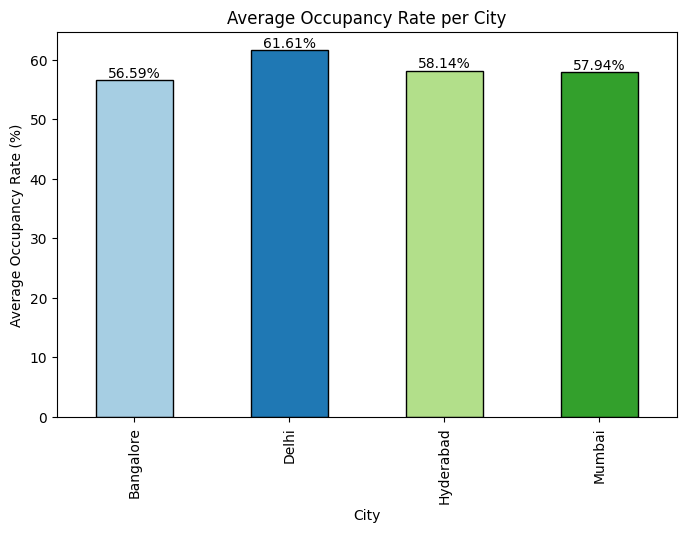

In [60]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(8, 5))
avg_occupancy_rate_per_city.plot.bar(
    color=plt.cm.Paired.colors,  # Different colors for each bar
    edgecolor='black'            # Outline the bars
)

# Add a title and labels
plt.title("Average Occupancy Rate per City")
plt.xlabel("City")
plt.ylabel("Average Occupancy Rate (%)")

# Show the percentage value on top of each bar
for i, value in enumerate(avg_occupancy_rate_per_city):
    plt.text(i, value + 0.5, f'{value}%', ha='center', fontsize=10)

# Show the plot
plt.show()


<br> <!-- Creates a small blank space -->

### **3. When was the occupancy better? Weekday or Weekend?**

In [61]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May-22,W 19,weekend
1,02-May-22,May-22,W 19,weekday
2,03-May-22,May-22,W 19,weekday


In [62]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May-22,W 20,weekday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May-22,W 20,weekday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May-22,W 20,weekday


In [63]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekday    50.90
weekend    72.39
Name: occ_pct, dtype: float64

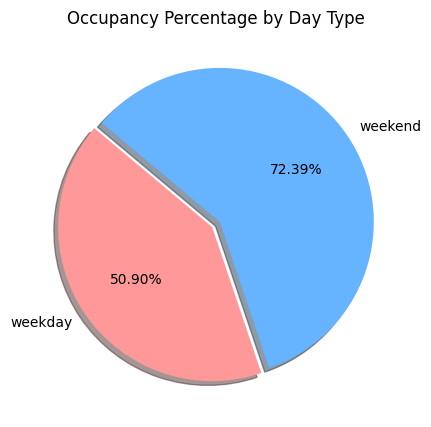

In [64]:
import matplotlib.pyplot as plt

# Group by 'day_type' and calculate the mean of 'occ_pct'
mean_occ_pct = df.groupby("day_type")["occ_pct"].mean().round(2)

# Create and display the pie chart
plt.figure(figsize=(5, 5))  # Set figure size for better readability
plt.pie(
    mean_occ_pct, 
    labels=mean_occ_pct.index,  # Use day_type as labels
    autopct=lambda p: '{:.2f}%'.format(p * sum(mean_occ_pct) / 100),  # Display exact percentage values
    startangle=140, 
    explode=[0.03] * len(mean_occ_pct),  # Slightly explode all slices for emphasis
    shadow=True, 
    colors=['#ff9999', '#66b3ff']  # Adjust colors based on the number of slices
)

plt.title("Occupancy Percentage by Day Type")
plt.gca().set_aspect('equal')  # Ensure the pie chart is circular
plt.show()


<br> <!-- Creates a small blank space -->

### **4: In the month of June, what is the occupancy for different cities**

In [65]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type


In [66]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

Series([], Name: occ_pct, dtype: float64)

<br>

### **5: We got new data for the month of august. Append that to existing data**

In [67]:
df_august = pd.read_csv("datasets/new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [68]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [69]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [70]:
df_august.shape

(7, 13)

In [71]:
df.shape

(6500, 14)

In [72]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis = 0)
latest_df.tail(8)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6499,18560,31-Jul-22,RT4,12,15.0,80.0,Presidential,Atliq City,Business,Hyderabad,31-Jul-22,Jul-22,W 32,weekend,NaN
6500,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6501,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6502,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6503,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6504,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6505,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6506,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [73]:
latest_df.shape

(6507, 15)

<br> <!-- Creates a small blank space -->

### **6. Print revenue realized per city**

In [74]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [75]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [76]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [77]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

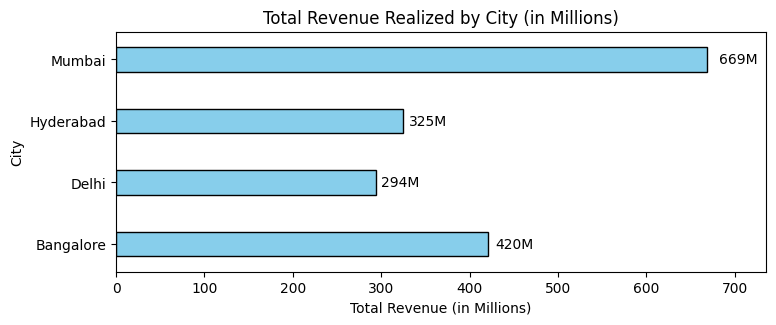

In [78]:
import matplotlib.pyplot as plt

# Group by city and calculate the total revenue
city_revenue = df_bookings_all.groupby("city")["revenue_realized"].sum()

# Convert revenue to millions
city_revenue_millions = city_revenue / 1_000_000

# Create the horizontal bar chart with adjusted figure size
plt.figure(figsize=(10, 3))  # Adjust the figure size for better spacing

ax = city_revenue_millions.plot(kind="barh", color='skyblue', edgecolor='black', width=0.4)  # Adjust bar width

# Add title and labels
plt.title("Total Revenue Realized by City (in Millions)")
plt.xlabel("Total Revenue (in Millions)")
plt.ylabel("City")

# Adjust x-axis limits to ensure highest value is fully shown
plt.xlim(0, city_revenue_millions.max() * 1.1)  # Extend the x-axis limit by 10%

# Annotate values on bars
for p in ax.patches:
    plt.text(p.get_width() + 0.02 * p.get_width(), p.get_y() + p.get_height() / 2., 
             f'{p.get_width():,.0f}M', ha='left', va='center')

plt.subplots_adjust(left=0.2, right=0.85, top=0.9, bottom=0.1)  # Adjust subplot parameters for spacing
plt.show()


<br> <!-- Creates a small blank space -->

### **7. Print month by month revenue**

In [79]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May-22,W 19,weekend
1,02-May-22,May-22,W 19,weekday
2,03-May-22,May-22,W 19,weekday


In [80]:
df_date["mmm yy"].unique()

array(['May-22', 'Jun-22', 'Jul-22'], dtype=object)

In [81]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [82]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [83]:
df_date["date"] = pd.to_datetime(df_date["date"], errors='coerce')
df_date.head()

C:\Users\Inder Panda\AppData\Local\Temp\ipykernel_15344\3148207323.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"] = pd.to_datetime(df_date["date"], errors='coerce')


,date,mmm yy,week no,day_type
0,2022-05-01,May-22,W 19,weekend
1,2022-05-02,May-22,W 19,weekday
2,2022-05-03,May-22,W 19,weekday
3,2022-05-04,May-22,W 19,weekday
4,2022-05-05,May-22,W 19,weekday


In [84]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [85]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"], errors='coerce')
df_bookings_all.head(3)

#  errors='coerce'

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [86]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May-22,W 19,weekday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May-22,W 19,weekday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May-22,W 19,weekday


In [87]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul-22    60278496
Jun-22    52903014
May-22    60961428
Name: revenue_realized, dtype: int64

<br> <!-- Creates a small blank space -->

## **Excercises :-**

### **Exercise-1. Print revenue realized per hotel type**

In [88]:
df_bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [89]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

property_name
Atliq Seasons     6672245
Atliq Grands     21644446
Atliq Blu        26459751
Atliq Bay        26936115
Atliq City       29047727
Atliq Palace     30945855
Atliq Exotica    32436799
Name: revenue_realized, dtype: int64

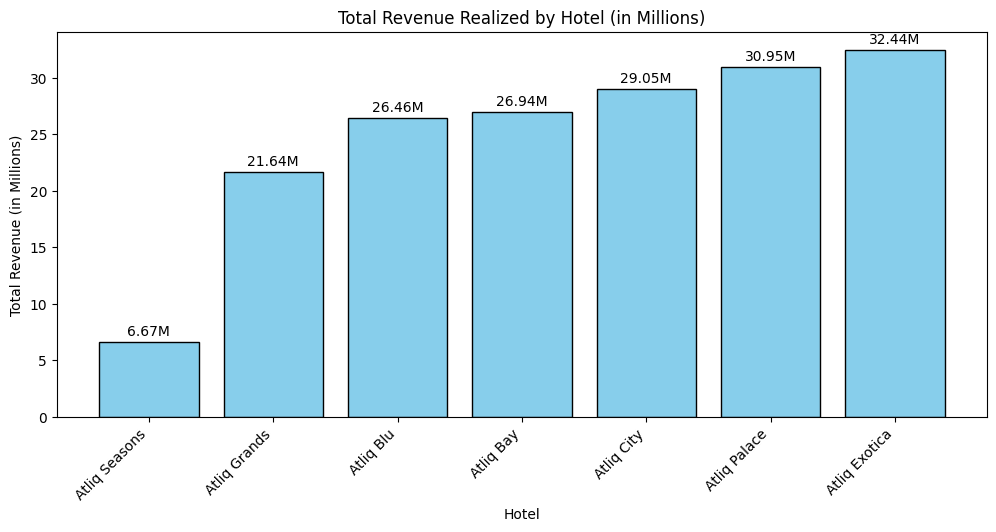

In [90]:
import matplotlib.pyplot as plt

# Data for plotting (converted to millions)
revenue_by_hotel_millions = df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values() / 1_000_000

# Create vertical bar chart
plt.figure(figsize=(12, 5))
plt.bar(revenue_by_hotel_millions.index, revenue_by_hotel_millions, color='skyblue', edgecolor='black')
plt.title("Total Revenue Realized by Hotel (in Millions)")
plt.xlabel("Hotel")
plt.ylabel("Total Revenue (in Millions)")
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability

# Annotate values on bars
for i, value in enumerate(revenue_by_hotel_millions):
    plt.text(i, value + 0.3, f'{value:.2f}M', ha='center', va='bottom')

plt.show()


<br> <!-- Creates a small blank space -->

### **Exercise-2 Print average rating per city**

In [91]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.41
Delhi        3.79
Hyderabad    3.65
Mumbai       3.63
Name: ratings_given, dtype: float64

<br><br><br><br><br>  <!-- Creates a small blank space -->

### **Exercise-3 Print a pie chart of revenue realized per booking platform**

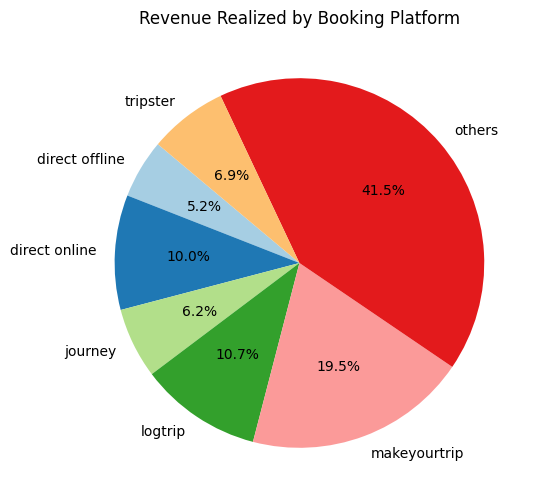

In [92]:
import matplotlib.pyplot as plt

# Group by booking platform and calculate total revenue realized
revenue_by_platform = df_bookings_all.groupby("booking_platform")["revenue_realized"].sum()

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(revenue_by_platform, labels=revenue_by_platform.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(revenue_by_platform))), startangle=140)

# Add title
plt.title("Revenue Realized by Booking Platform")

plt.show()


<br><br><br><br><br><br><br><br> <!-- Creates a small blank space -->

<br><br><br><br><br><br> <!-- Creates a small blank space -->

<div style="background-color: #4CAF50; padding: 12px; border-radius: 12px;">
    <h2 align="center" style="color: white; font-weight: bold">5. Key Insights Summary</h2>
</div>


### **Average Occupancy by Room Type**

- Presidential rooms have the highest average occupancy (59.30%).
- Elite and Premium rooms have the lowest average occupancy (58.03% and 58.04%).

### **Average Occupancy Rate per City**

- Delhi has the highest average occupancy rate (61.61%).
- Bangalore has the lowest average occupancy rate (56.59%).

### **Weekday vs. Weekend Occupancy**

- Occupancy is significantly higher on weekends (72.39%) compared to weekdays (50.90%).

### **Occupancy Rates in June**

- Delhi had the highest occupancy in June (62.47%).
- Bangalore had the lowest occupancy in June (56.58%).

### **Revenue Realized per City**

- Mumbai generates the highest revenue (`$668,569,251`).
- Bangalore generates the lowest revenue (`$420,383,550`).

### **Revenue by Hotel Type**

- Atliq Exotica has the highest revenue (`$32,436,799`).
- Atliq Seasons has the lowest revenue (`$6,672,245`).

### **Average Rating per City**

- Delhi has the highest average rating (3.79).
- Bangalore has the lowest average rating (3.41).


<br><br><br><br><br><br><br><br><br><br> <!-- Creates a small blank space -->

<div style="background-color: #4CAF50; padding: 12px; border-radius: 12px;">
    <h2 align="center" style="color: white; font-weight: bold">6. Recommendations</h2>
</div>


<br> <!-- Creates a small blank space -->



### **1. Promote Less Popular Room Types and Cities**

- Use targeted promotions and partnerships to boost occupancy in less popular room types and cities.

### **2. Enhance Weekday Occupancy**

- Create attractive weekday offers and corporate partnerships to balance occupancy rates.

### **3. Adjust Strategies Based on Revenue and Ratings**

- Focus on cities and hotel types with lower revenue and ratings for targeted improvements.

### **4. Utilize Data for Decision-Making**

- Regularly integrate and analyze new data to make informed decisions and forecasts.

### **5. Improve Customer Satisfaction**
   - Invest in training and resources to enhance guest experience, particularly in cities and hotel types with lower average ratings.

### **6. Optimize Marketing Efforts**
   - Tailor marketing campaigns based on historical data to effectively target high-potential markets and improve overall occupancy and revenue.

<br><br><br><br><br><br>

<--------------------   Presented by Inder Panda   -------------------->